# TA session #01: simple salary prediction model of hitters

Your team and team members here

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

To exericse variance-bias tradeoff, we use Hitters.csv
For details of dataset, see [description](https://rdrr.io/cran/ISLR/man/Hitters.html)

In [2]:
data = pd.read_csv('Data/Hitters.csv', index_col=0)
data.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
-Andy Allanson,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
-Alan Ashby,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
-Alvin Davis,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
-Andre Dawson,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
-Andres Galarraga,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [3]:
output = 'Salary'

## 1. Preprocessing & EDA (in brief)

In [4]:
#TODO: evaluate data dimension
data.shape

(322, 20)

In [5]:
#TODO:summarize data
data.describe()
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 322 entries, -Andy Allanson to -Willie Wilson
Data columns (total 20 columns):
AtBat        322 non-null int64
Hits         322 non-null int64
HmRun        322 non-null int64
Runs         322 non-null int64
RBI          322 non-null int64
Walks        322 non-null int64
Years        322 non-null int64
CAtBat       322 non-null int64
CHits        322 non-null int64
CHmRun       322 non-null int64
CRuns        322 non-null int64
CRBI         322 non-null int64
CWalks       322 non-null int64
League       322 non-null object
Division     322 non-null object
PutOuts      322 non-null int64
Assists      322 non-null int64
Errors       322 non-null int64
Salary       263 non-null float64
NewLeague    322 non-null object
dtypes: float64(1), int64(16), object(3)
memory usage: 52.8+ KB


In [6]:
# TODO:dataset validation (e.g. check whether missing values)
data.isnull().sum()

AtBat         0
Hits          0
HmRun         0
Runs          0
RBI           0
Walks         0
Years         0
CAtBat        0
CHits         0
CHmRun        0
CRuns         0
CRBI          0
CWalks        0
League        0
Division      0
PutOuts       0
Assists       0
Errors        0
Salary       59
NewLeague     0
dtype: int64

In [7]:
# TODO: data preprocessing (e.g. handling missing values, one-hot encoding for categorical variables, normalization...)
data = data.dropna()
data = pd.get_dummies(data, columns=['League', 'Division', 'NewLeague'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f81f935d510>,
      dtype=object)

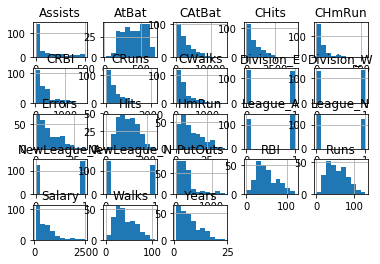

In [8]:
# TODO:looking output (dependent) variable  (e.g. box-ploting, histogram)
# predata.boxplot()
data.hist()

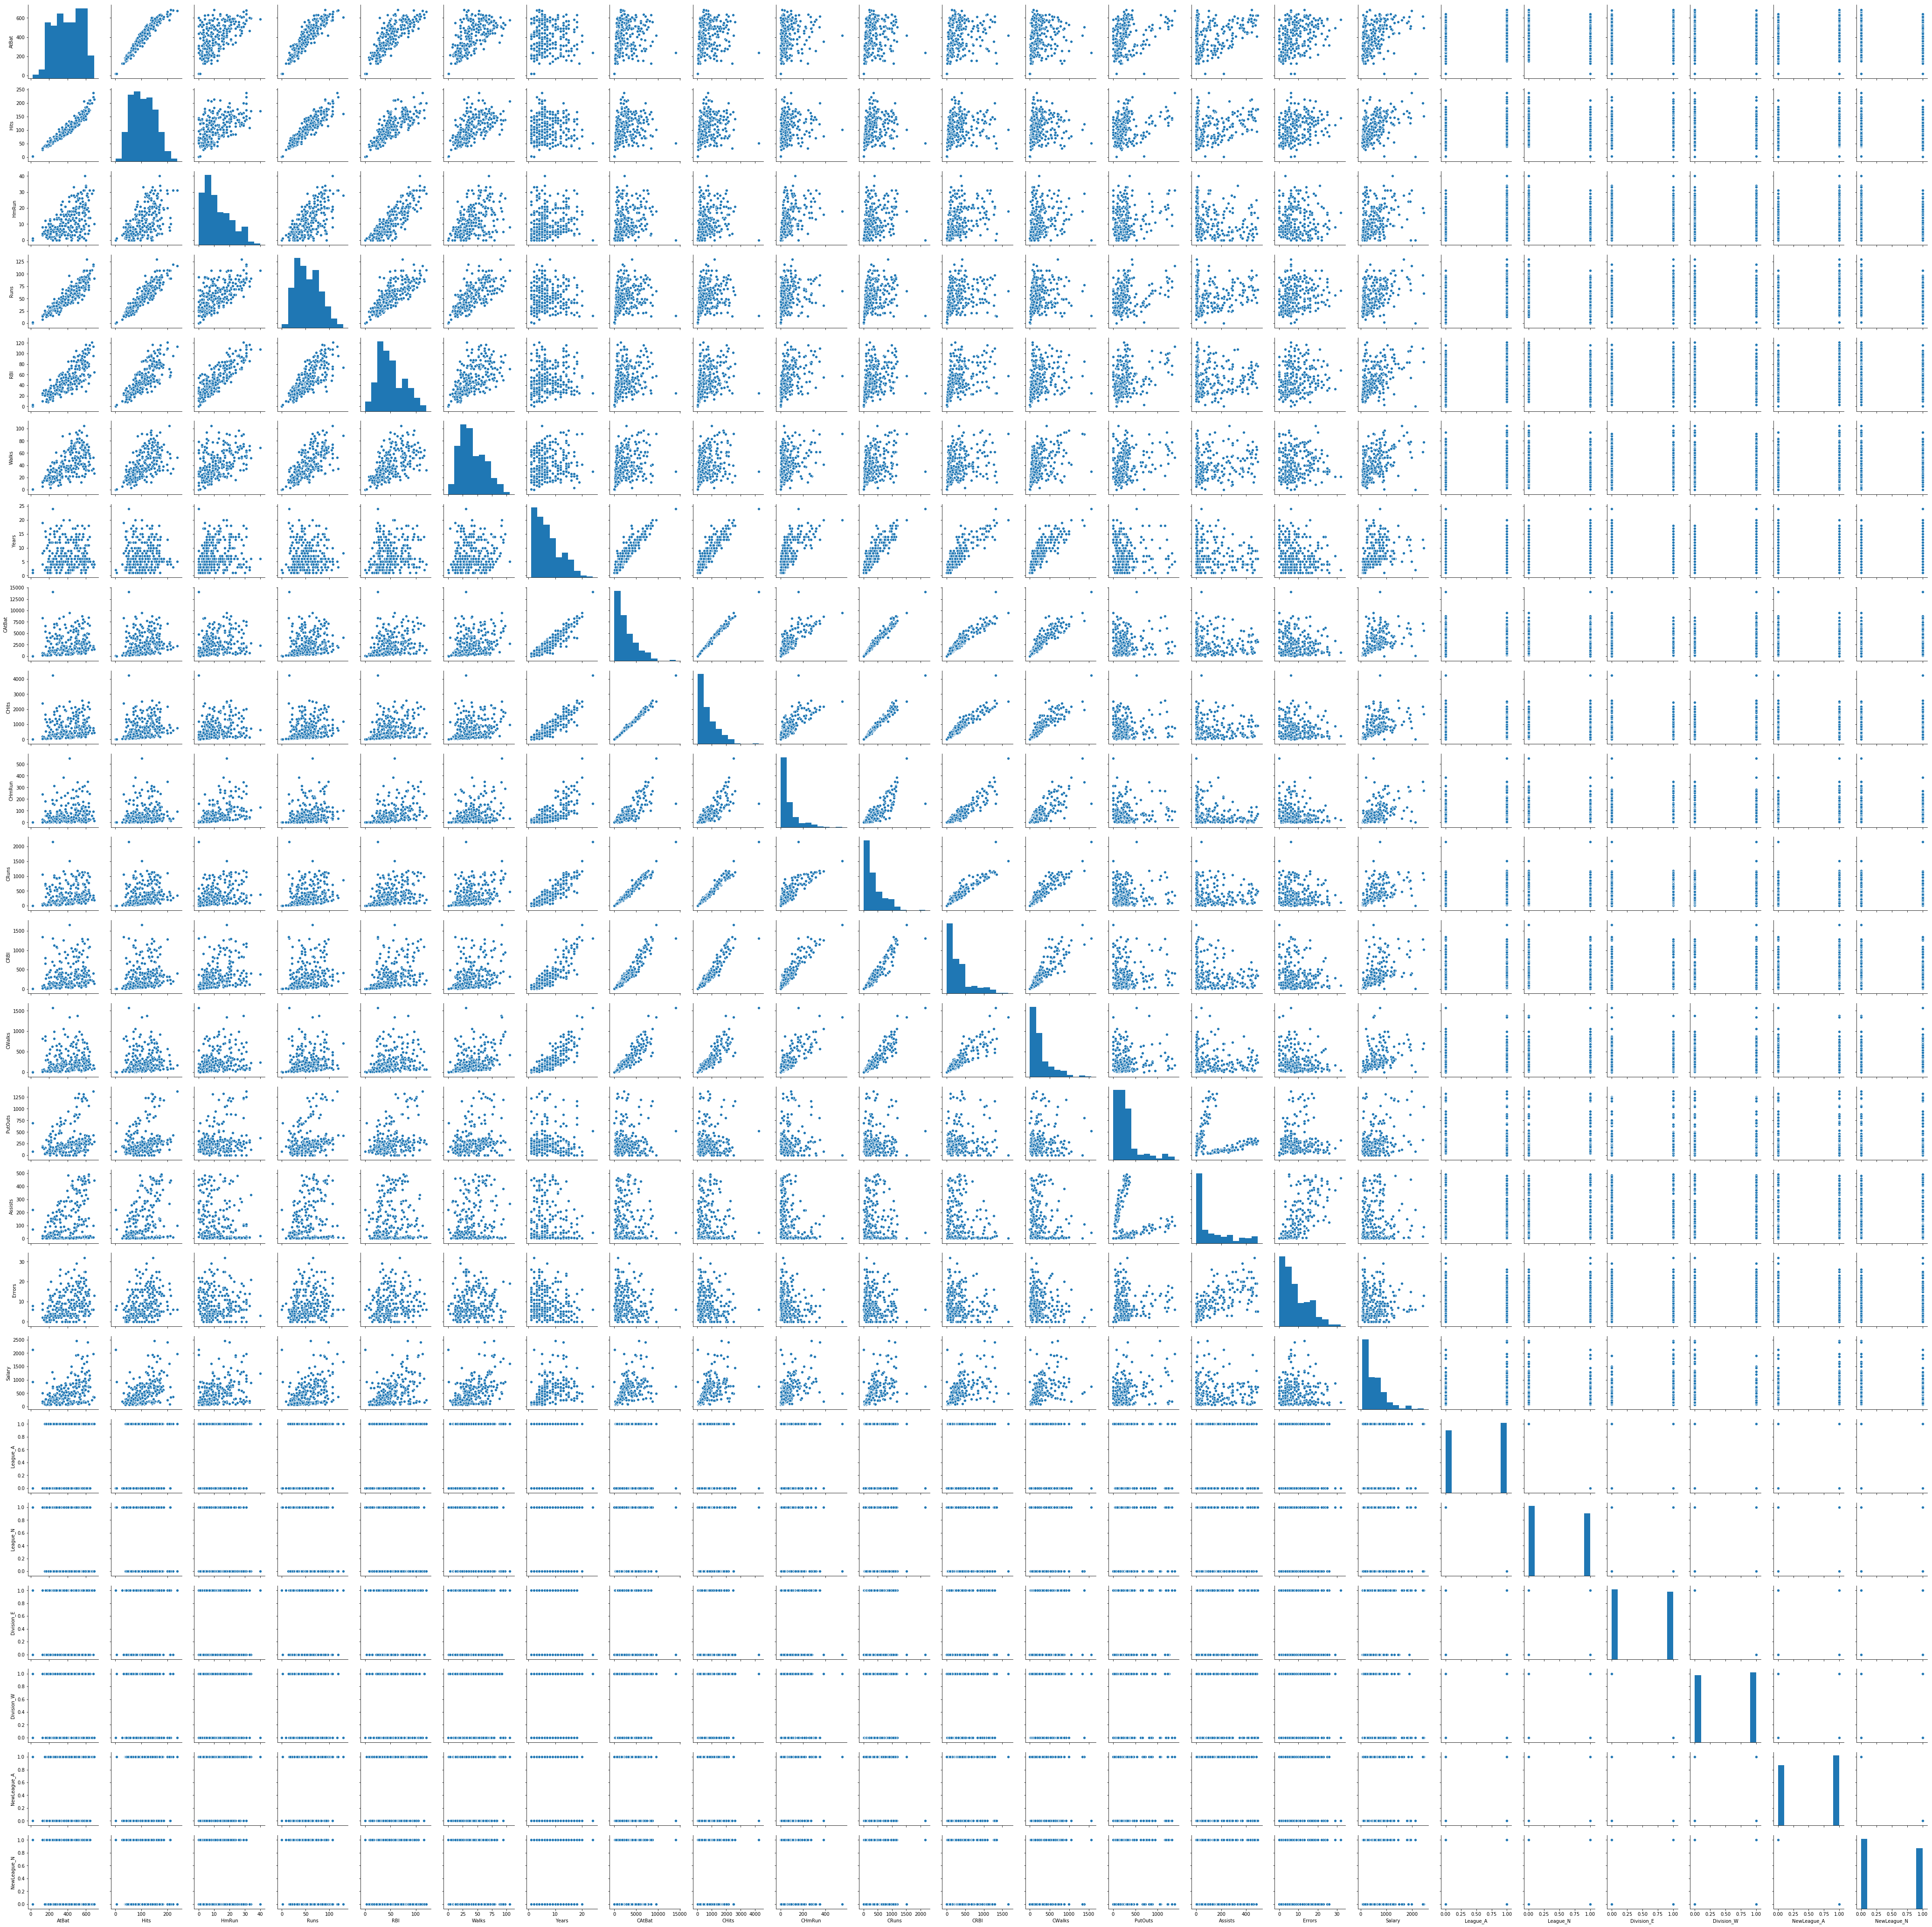

In [9]:
#TODO: looking for correlations (use pairplot)
sns.pairplot(data=data)

In [10]:
# TODO: feature selection (you can also choose any two features which are correlated in output variable )

features = ['AtBat', 'CRuns']

Describe your opinions after EDA 

## 2. Training data generation - train/test split

In [11]:
from sklearn.model_selection import train_test_split
X = data[features]
y = np.array([int(i > 425) for i in data[output]])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1008)

## 3. KNN model tuning (regarding model flexibility)

Here is a function to plot K-Nearest Neighbors.

You can invoke the function with 3 mandatory parameters:

- n_neighbors : number of neighbors which is reated to the model plexibility
- predictor_1: name of feature which will be shown in x-axis
- predictor_2: name of feature which will be shown in y-axis

In [20]:
def knnclassifier(n_neighbors, predictor_1, predictor_2, X=X, y=y, X_test=X_test, y_test=y_test):
    
    clf = neighbors.KNeighborsClassifier(n_neighbors)
    clf.fit(X, y)
    y_pred = clf.predict(X)

    h = 10

    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00'])
    cmap = ListedColormap(['magenta', 'darkblue'])

    x_min, x_max = X[predictor_1].min() - 1, X[predictor_1].max() + 1
    y_min, y_max = X[predictor_2].min() - 1, X[predictor_2].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    score = clf.score(X_test, y_test)
    
    plt.figure(figsize=(10, 6))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    plt.scatter(X[predictor_1], X[predictor_2], c=y, cmap=cmap_bold, s=10, label='Train')
    plt.scatter(X_test[predictor_1], X_test[predictor_2], c=y_test, cmap=cmap, s=25, marker='x', label='Test')
    plt.title('K=%i, Accuracy=%.2f' %(n_neighbors, score))
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xlabel(predictor_1)
    plt.ylabel(predictor_2)
    
    plt.legend(loc='best')
    plt.show()

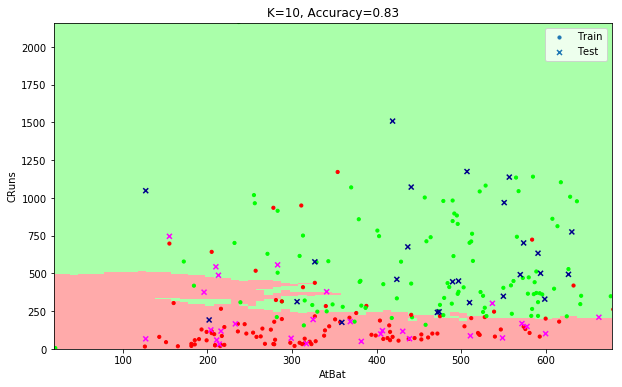

In [21]:
# TODO: Show how the number of neighbors takes effect on the decision boundary. 
knnclassifier(10, 'AtBat', 'CRuns', X_train,  y_train, X_test, y_test)

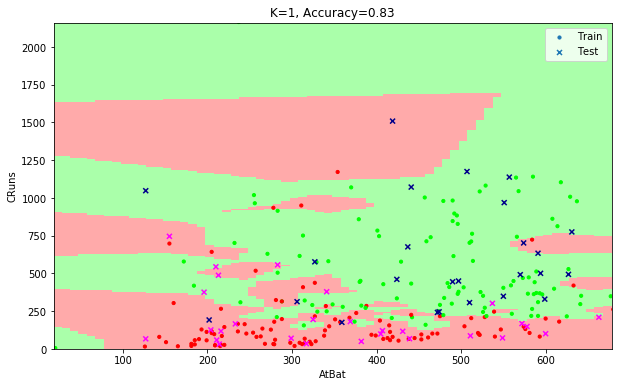

In [24]:
knnclassifier(1, 'AtBat', 'CRuns', X_train,  y_train, X_test, y_test)

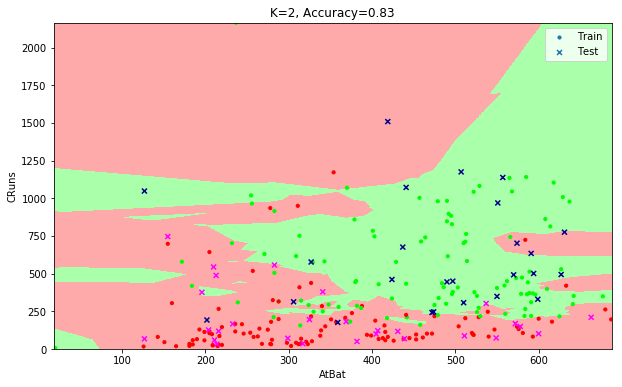

In [15]:
knnclassifier(2, 'AtBat', 'CRuns', X_train,  y_train, X_test, y_test)

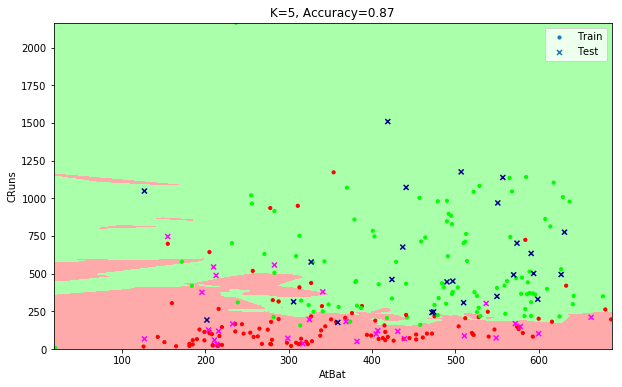

In [16]:
knnclassifier(5, 'AtBat', 'CRuns', X_train,  y_train, X_test, y_test)

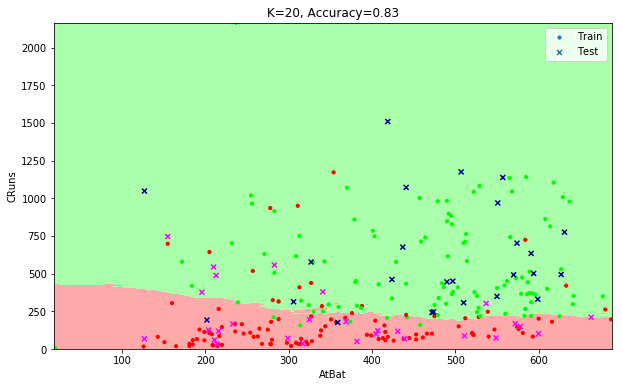

In [17]:
knnclassifier(20, 'AtBat', 'CRuns', X_train,  y_train, X_test, y_test)

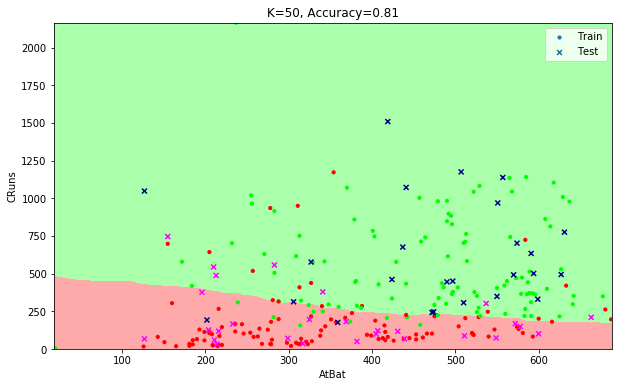

In [18]:
knnclassifier(50, 'AtBat', 'CRuns', X_train,  y_train, X_test, y_test)

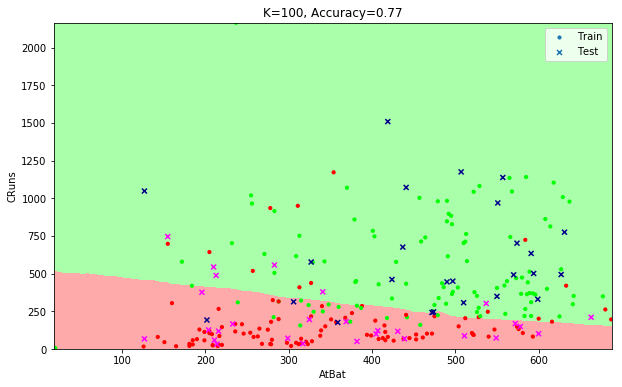

In [19]:
knnclassifier(100, 'AtBat', 'CRuns', X_train,  y_train, X_test, y_test)

## 4. 5-fold Cross Validation

In [27]:
from sklearn.model_selection import cross_val_score
import numpy as np
K = [1, 2, 5, 10, 20, 50, 100]
for i in K:
    n_neighbors  = i
    knn_cv = neighbors.KNeighborsClassifier(n_neighbors=n_neighbors)
    knn_cv.fit(X_train, y_train)

    cv_scores = cross_val_score(knn_cv, X_train, y_train, cv=5)

    print("k: {}, cv_scores mean:{}".format(n_neighbors, np.mean(cv_scores)))
    print(knn_cv.score(X_test, y_test))

k: 1, cv_scores mean:0.7677416740944818
0.8301886792452831
k: 2, cv_scores mean:0.7347405666747697
0.8301886792452831
k: 5, cv_scores mean:0.8152607838370741
0.8679245283018868
k: 10, cv_scores mean:0.8297733841125787
0.8301886792452831
k: 20, cv_scores mean:0.8391810496178053
0.8301886792452831
k: 50, cv_scores mean:0.8439483564270859
0.8113207547169812
k: 100, cv_scores mean:0.80606379817951
0.7735849056603774


In [56]:
#additional exercise: use of Grid search CV
from sklearn.model_selection import GridSearchCV
parameters = {'n_neighbors': np.arange(1,101)}
knn = neighbors.KNeighborsClassifier()
gs = GridSearchCV(estimator=knn, cv=5, param_grid=parameters)
gs.fit(X_train, y_train)
gs.best_params_
print("Best Params: {} Best Score: {}".format(gs.best_params_, gs.best_score_))
# TODO:invoke GridSearchCV to find the best n_neighbors

Best Params: {'n_neighbors': 19} Best Score: 0.8523809523809524


/home/anaconda/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Describe how many the number of neighbors will be proper here

## 5. Checking fitness of model

In [103]:
k = np.arange(1,101)
acc = [] # test accuracies per each number of neighbors
acc_train = [] # train accuracies per each number of neighbors
for kk in k:
    model = neighbors.KNeighborsClassifier(n_neighbors=kk)
    model.fit(X_train, y_train)
    acc_train.append(model.score(X_train, y_train))
    acc.append(model.score(X_test, y_test))
#     print(model.score(X_test, y_test))

# TODO: fill-in the values into above lists

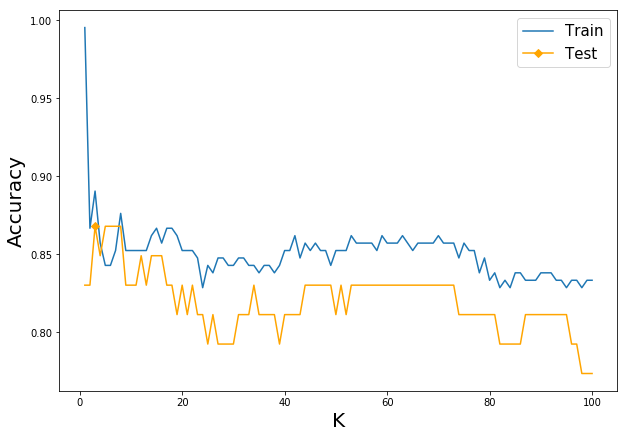

In [104]:
# TODO: plot here
markers_on = [np.argmax(acc)]
plt.figure(figsize=(10, 7))
plt.plot(k, acc_train, label='Train')
plt.plot(k, acc, '-gD', markevery=markers_on, c='orange', label='Test')
plt.legend(fontsize=15)
plt.xlabel('K', size=20)
plt.ylabel('Accuracy', size=20)
plt.show()

In [107]:
markers_on = [np.argmax(acc)]
plt.figure(figsize=(10, 7))
plt.plot(1/k, 1-acc_train.value, label='Train')
plt.plot(1/k, 1-acc.value, '-gD', markevery=markers_on, c='orange', label='Test')
plt.legend(fontsize=15)
plt.xlabel('1/K', size=20)
plt.ylabel('Error', size=20)
plt.show()

AttributeError: 'list' object has no attribute 'values'

<Figure size 720x504 with 0 Axes>

Describe your answers here

## Summary

In [ ]:
Describe overall comment here